In [54]:
import numpy as np
import keras
import matplotlib.pyplot as plt

In [55]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Scale the images to the [0, 1] interval
X_train = X_train.astype("float32") / 255.
X_test = X_test.astype("float32") / 255.

# Add the "channel" dimension
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [56]:
print("x_train: ", X_train.shape)

x_train:  (60000, 28, 28, 1)


In [57]:
print(y_train.shape)
print(y_train[:5])

(60000,)
[9 0 0 3 0]


In [58]:
y_train = keras.utils.to_categorical(y_train, 10)

In [59]:
print(y_train.shape)

(60000, 10)


In [60]:
y_test = keras.utils.to_categorical(y_test, 10)

In [61]:
print(y_test.shape)

(10000, 10)


In [62]:
image_shape = X_train[0].shape
print(image_shape)

(28, 28, 1)


In [63]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

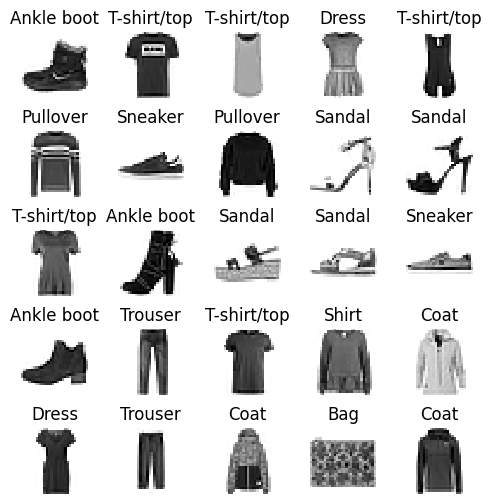

In [64]:
n_rows = 5
n_cols = 5
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[np.argmax(y_train[index])])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

In [65]:
model = keras.Sequential(
    [
        keras.layers.Input(shape=(28, 28, 1)),
        keras.layers.Flatten(input_shape=[28,28]),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ]
)
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,506 (103.54 KB)

 Trainable params: 26,506 (103.54 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [67]:
batch_size = 128    # How many images to load in a single batch
epochs = 10         # How many times to iterate over the full dataset

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7660 - loss: 0.6936 - val_accuracy: 0.8322 - val_loss: 0.4827
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.8441 - loss: 0.4507 - val_accuracy: 0.8363 - val_loss: 0.4454
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.8563 - loss: 0.4105 - val_accuracy: 0.8540 - val_loss: 0.4126
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.8632 - loss: 0.3900 - val_accuracy: 0.8623 - val_loss: 0.3956
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - accuracy: 0.8704 - loss: 0.3707 - val_accuracy: 0.8633 - val_loss: 0.3791
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8732 - loss: 0.3570 - val_accuracy: 0.8602 - val_loss: 0.3834
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8746 - loss: 0.3487 - val_accuracy: 0.8678 - val_loss: 0.3678
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8795 - loss: 0.3367 - val_accu

In [68]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


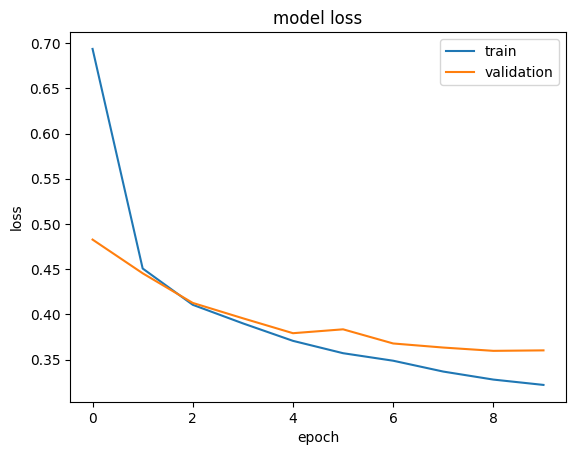

In [69]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

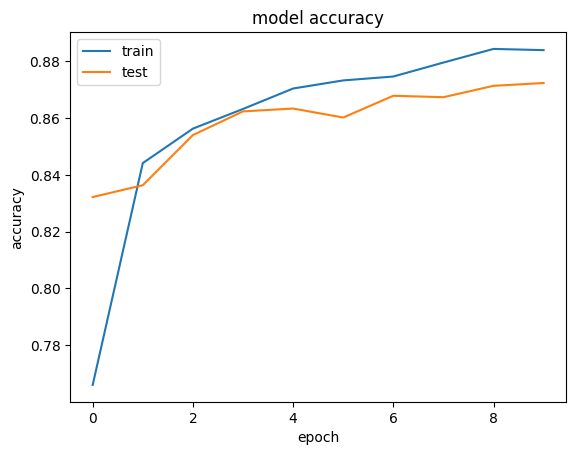

In [70]:

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [71]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.38837191462516785
Test accuracy: 0.8658000230789185
